# Earthquakes and Tectonic Plate Boundaries

**Our goals for today:**
- Review topography and seafloor age.
- Load and visualize an earthquake catalog.
- Plot histograms of earthquake magnitude and depth.
- Think about these data in terms of plate tectonics.

### Setup

Run this cell as it is to setup your environment and login to okpy.

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from cartopy import config
import cartopy.crs as ccrs

## Review topography looking at North Atlantic

Let us use the `Robinson` projection to look at the large underwater mountain range of the Mid-Atlantic ridge.

In [55]:
lats = np.loadtxt('./data/etopo20lats.txt') 
lons = np.loadtxt('./data/etopo20lons.txt')
topo_grid = np.loadtxt('./data/etopo20data.txt')

# repeat the array of latitudes 1081 times
x=topo_grid.shape
latitude =  np.repeat(lats,x[1]) 

# reshape that (583740,1) element array to (540,1081)
lat_grid = latitude.reshape(x[0],x[1]) 

# repeat the array of longtitudes 540 times as rows
lon_grid = np.tile(lons,(x[0],1)) 

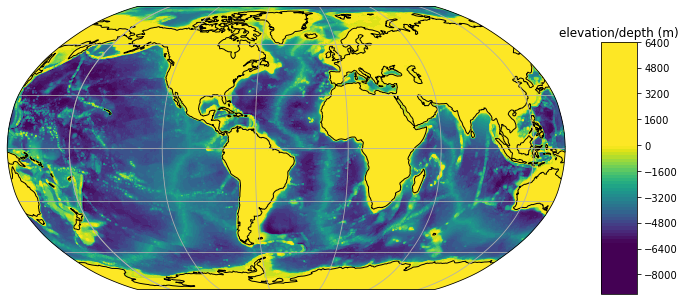

In [56]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-40.0))
ax.set_global()
plt.contourf(lon_grid, lat_grid, topo_grid,100,vmax=0,vmin=-6000,
             cmap=cm.viridis,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 
plt.title('elevation/depth (m)'); 

plt.show()

## Review seafloor age looking at North Atlantic

In [57]:
seafloor_age_data = pd.read_csv('./data/age.csv')

age_longitude = np.asarray(seafloor_age_data['longitude'])
age_latitude = np.asarray(seafloor_age_data['latitude'])
age = np.asarray(seafloor_age_data['age_Ma'])

age_grid = age.reshape((901,1801))
age_long_grid = age_longitude.reshape((901,1801))
age_lat_grid = age_latitude.reshape((901,1801))

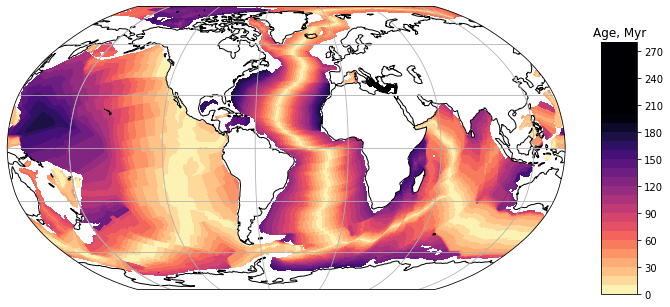

In [58]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-40.0))
ax.set_global()
plt.contourf(age_long_grid, age_lat_grid, age_grid,30,
             cmap=cm.magma_r,vmax=200,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 
plt.title('Age, Myr'); 

plt.show()

What patterns do you observe? Where is the youngest seafloor in relation to the seafloor ridges we observed in our map of topography? Where is the oldest seafloor? 

## Load the Earthquake Catalog

Go to https://earthquake.usgs.gov/earthquakes/search/

Download a .csv data file of all the earthquakes of magnitude 5.0 and higher from the past 10 years. To get a .csv, rather than a map, click on output options. Alternatively, you could use the USGS API to access the data as we did in the first in-class period by modifying this URL with the right dates:
'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2020-08-15%2000:00:00&endtime=2020-09-14%2023:59:59&minmagnitude=2.5&orderby=time'

Note that there is a search limit of 20,000 events, so if you try modifying this keep that in mind. If the data search does not work it is useful to use the `query_url` in a new tab to see what sort of error the server reports - it is likely to be exceeding the 20k limit

In [59]:
start_day = '2010-09-15'
end_day = '2020-09-11'
standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'

query_url = standard_url + '&starttime=' + start_day + '&endtime=' + end_day + '&minmagnitude=5.0'
#EQ_data = pd.read_csv(query_url)
EQ_data = pd.read_csv('./query.csv')
#EQ_data.to_csv('./data/save_eq_data.csv')
EQ_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-09-11T09:23:05.407Z,-59.6406,-26.4133,56.07,5.5,mww,NaN,31.0,7.685,0.79,...,2021-09-12T09:26:38.356Z,South Sandwich Islands region,earthquake,10.1,5.0,0.078,16.0,reviewed,us,us
1,2021-09-11T09:10:50.085Z,-56.0474,-27.9317,105.12,5.1,mb,NaN,62.0,9.983,0.49,...,2021-09-11T09:31:51.040Z,South Sandwich Islands region,earthquake,10.2,4.9,0.065,76.0,reviewed,us,us
2,2021-09-11T04:56:38.349Z,-6.3923,151.0442,10.00,5.0,mb,NaN,126.0,2.454,1.07,...,2021-09-11T05:12:36.040Z,"136 km SE of Kimbe, Papua New Guinea",earthquake,12.8,1.9,0.126,21.0,reviewed,us,us
3,2021-09-11T03:20:17.248Z,14.1342,92.9080,10.00,5.2,mb,NaN,45.0,2.468,1.01,...,2021-09-11T03:39:23.040Z,"270 km N of Bamboo Flat, India",earthquake,7.2,1.8,0.050,140.0,reviewed,us,us
4,2021-09-10T20:09:34.430Z,-4.6380,153.2894,60.83,5.0,mb,NaN,121.0,1.207,0.80,...,2021-09-10T20:26:05.040Z,"117 km ESE of Kokopo, Papua New Guinea",earthquake,9.5,6.0,0.090,42.0,reviewed,us,us


Recall from the homework that Pandas dataframe columns can be accessed using bracket notation with the name of the column as a string:

In [60]:
EQ_data['mag']

0        5.5
1        5.1
2        5.0
3        5.2
4        5.0
        ... 
19796    5.3
19797    5.1
19798    5.1
19799    5.3
19800    5.1
Name: mag, Length: 19801, dtype: float64

## Largest Earthquake in Catalog

What is the largest magnitude earthquake in our catalog?

<font color=goldenrod>**_Code for you to write_**</font>

Use the `np.max()` function on the `EQ_data['mag']` column to answer this question in the code block below.

In [61]:
np.max(EQ_data['mag'])

9.1

Write the magnitude in this cell:



### Determining when and where the largest Earthquake happened

To determine when this earthquake happened we need to find the data associated with this magnitude event. Pandas has really nice filtering functions built in. They take a while to get comfortable with, but can help us answer this question. 

Define a variable `largest_magnitude` that is the largest magnitude and then execute the cell below to get the date and time.

In [62]:
largest_magnitude = np.max(EQ_data['mag'])
print(f'The largest magnitude is {largest_magnitude:.1f}')

The largest magnitude is 9.1


In [63]:
largest_eq_date = EQ_data['time'][EQ_data['mag'] == largest_magnitude]
print(largest_eq_date)

18666    2011-03-11T05:46:24.120Z
Name: time, dtype: object


In [64]:
EQ_data['time'][1]

'2021-09-11T09:10:50.085Z'

To determine where the earthquake happened we can use similar filtering. Replace the xxx with a conditional statement to get the latitude and longitude:

In [65]:
largest_eq_lon = EQ_data['longitude'][EQ_data['mag'] == largest_magnitude]
largest_eq_lat = EQ_data['latitude'][EQ_data['mag'] == largest_magnitude]

Let's plot a red square at the location of the largest earthquake in our catalog. To the `plt.scatter` function, add `s=100` to adjust the size of the marker. Add `color='red'` to change the color. Add `marker=s` to make it a square. 

Colors can be specified as detailed here: https://matplotlib.org/2.0.2/api/colors_api.html (html color names work: https://www.w3schools.com/colors/colors_names.asp).

Marker options are:
```
markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}
```

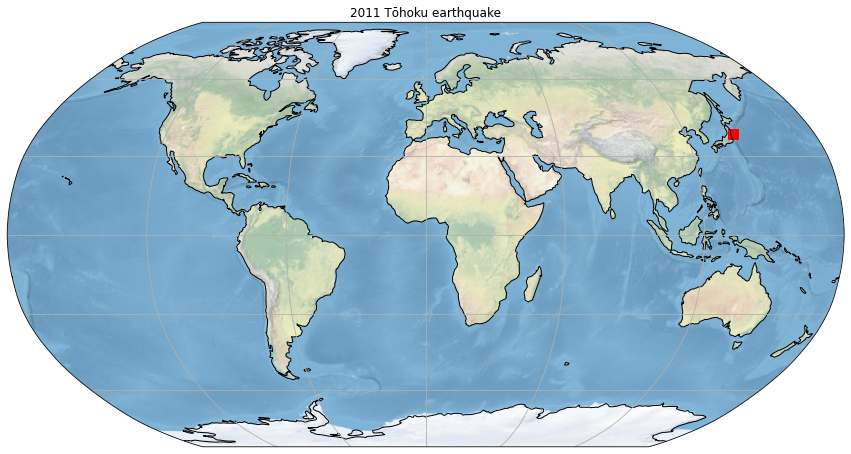

In [66]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

#plt.scatter(largest_eq_lon,largest_eq_lat,transform=ccrs.PlateCarree())
plt.scatter(largest_eq_lon,largest_eq_lat,marker='s',color='red',s=100,transform=ccrs.PlateCarree())

plt.title('2011 Tōhoku earthquake')    
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

<font color=darkred>**_Discussion question:_**</font> *What were the effects of this earthquake?*

https://youtu.be/dRFWuEWXmQk

https://youtu.be/gcSI8fBZsY0

https://youtu.be/5BHnf1wGD9w

https://youtu.be/iCcl5N7ZoF4

https://youtu.be/VuWTETyzR9Y

## Plot histogram of Earthquake Magnitude

How often do large earthquakes occur? To start addressing this question, let's plot a histogram of earthquake magnitudes.

<font color=goldenrod>**_Code for you to write_**</font>

You have made a histogram before (such as in class last week) so go and ahead and write the code to make one in the cell below that plots up the `EQ_data['mag']`.

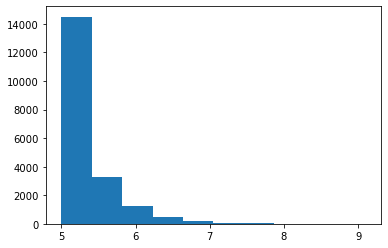

In [67]:
plt.hist(EQ_data['mag'])
plt.show()

There are so many small earthquakes that we can't even see a bin for the Tohoku quake. Let's make the histogram on a log-scale. For any function, we can put a question mark after it to get its docstring. Let's do this for `plt.hist`. Once you execute the cell below, you will see that there are a lot of options (which you can also view here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). One of the options is to make the plot be on a log scale by setting `log=True`.

In [68]:
#plt.hist?

**_Make a histogram of the Earthquake magnitude data on a log-scale_** 

Set `log=True` within the `plt.hist` function.

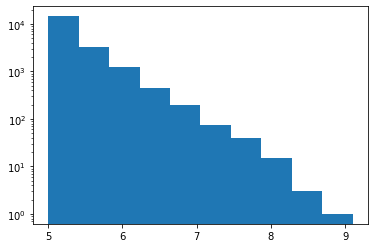

In [69]:
plt.hist(EQ_data['mag'],log='True')
plt.show()

Let's change the features of the plot from the defaults to improve our figure.

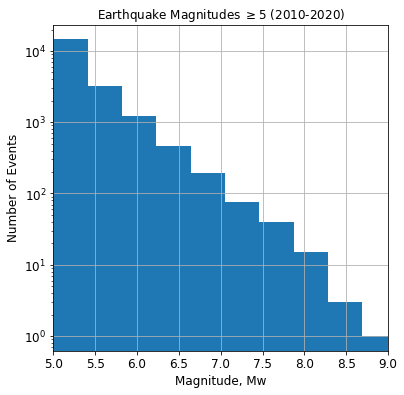

In [70]:
plt.figure(1,(6,6))
plt.hist(EQ_data['mag'],bins=10,label='Magnitude',log=True)
plt.xlabel('Magnitude, Mw', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Earthquake Magnitudes $\geq$5 (2010-2020)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(5,9)
plt.grid(True)
plt.show()

## Plot histogram of Earthquake Depths

Let's see the range and frequency of depths where earthquakes occur. **_Make a histogram of earthquake depth_**

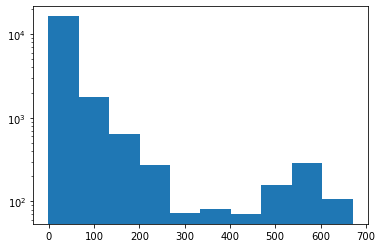

In [71]:
plt.hist(EQ_data['depth'],log='True')
plt.show()

<font color=darkred>**_Discussion question:_**</font> **_At what depth are the majority of earthquakes? How deep do they extend? How does that compare to the typical depth of the lithosphere (~100 km)?_**

_Write your answer here._ 

## Map of Earthquake Epicenters

Now let's plot the epicenters of the earthquakes on a Robinson projection. Replace the xxx's with longitude and latitude in order to make the map.

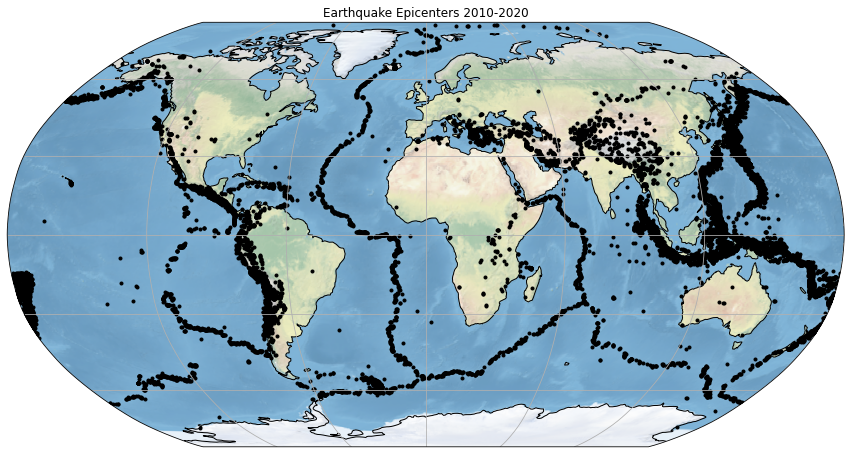

In [72]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

plt.scatter(EQ_data['longitude'],EQ_data['latitude'],marker='.',color='black',transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters 2010-2020')
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

## Small Group Discussion

Get into groups and discuss these questions while inspecting your maps:

**_Where do the majority of earthquakes occur?_**

**_What do those locations correspond with?_**

**_What properties of these earthquakes should we investigate to learn more about the nature of plate tectonics in different places?_**

_Write a summary of your discussion here._

## Maps of Earthquake Depth

The map we made above is nice, but it doesn't tell us everything about our data such as the depth of the earthquakes. Let's color code the earthquakes by depth when we map them.

To do this, use the same `plt.scatter()` function, but add the option to set the color by depth. You can do this by having  `c=EQ_data['depth']` within the function. You can customize the output by setting the minimum value for the color bar `vmin=0` and the maximum value `vmax=200`. You can also customize the colormap. A perceptually uniform sequential color map like `cmap='magma_r'` works well (https://matplotlib.org/tutorials/colors/colormaps.html). I think it also is nice to make the points partially see through by setting `alpha=0.5`. All of these customizations can be made by adding these arguments within the `plt.scatter()` function.

**_Make a map that colors points by depth by inserting these arguments in the plt.scatter() function in the code block below._**

In [73]:
lats=EQ_data['latitude'][EQ_data['depth'] < 20.]
len(lats)

10461

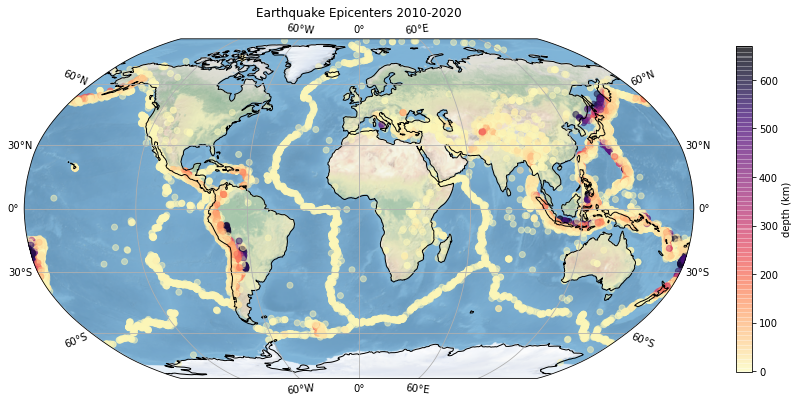

In [74]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

plt.scatter(EQ_data['longitude'],EQ_data['latitude'],c=EQ_data['depth'],cmap='magma_r',alpha=0.5,transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters 2010-2020')
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)
plt.colorbar(shrink=0.4,label='depth (km)')
plt.show()

**_What depth of earthquakes occur at mid-ocean ridges?_**

*Write your answer here.*

The earthquakes at trenches (like around the Pacific ocean's 'ring of fire') get deeper in a systematic way. The deepest earthquakes are the farthest from the trench. This reveals the location of the downgoing slabs.

<img src="./figures/slab_eq.png">
> A cross-section through a subduction zone. Red points are earthquake focus points. The most active region is the zone of contact between the plates. There is a back-arc seismic zone in the overriding plate. Below ~70 km depth earthquakes occur within the subducting plate, this region is call the Wadati-Benioff seismic zone.

What direction is subduction occuring below South America? Japan?

_Write your answer here._

## Andean subduction 

Let's look at a subset of this earthquake catalog across the Andes in South America. The code below is filtering the data frame to only include those between 20ºS and 25ºS latitude and 75ºW and 60ºW longitude.

In [75]:
selected_quakes = EQ_data[(EQ_data['latitude']>-25)&(EQ_data['latitude']<-20)
                          &(EQ_data['longitude']> -75)&(EQ_data['longitude']< -60)]

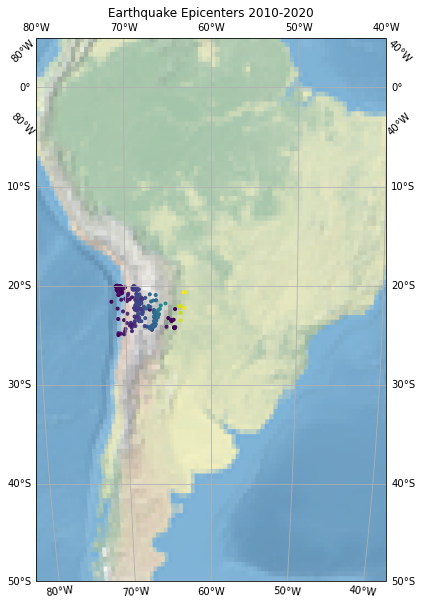

In [76]:
plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_extent([-80, -40, -50, 5], crs=ccrs.PlateCarree())

plt.scatter(selected_quakes['longitude'],selected_quakes['latitude'],marker='.',c=selected_quakes['depth'],transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters 2010-2020')
#ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

plt.show()

Let's take all of the earthquakes within that region and plot earthquake depth on the y-axis and earthquake location on the x-axis. **Labeling axes is super important in science! Don't make plots without labeled axes!**

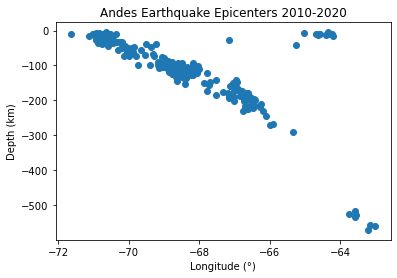

In [77]:
plt.scatter(selected_quakes['longitude'],-selected_quakes['depth'])
plt.title('Andes Earthquake Epicenters 2010-2020')
plt.xlabel('Longitude (°)')
plt.ylabel('Depth (km)')
plt.show()

## Pick and plot two other locations of interest

Filter the earthquake catalog by a latitude and longitude range like we did above the South America example. Plot the earthquakes on a map and make a similar depth vs. longitude plot (or depth vs latitude plot) for another region.

**You can take some time to explore different regions. We will then have a couple people come up and write the code to plot earthquake depths in other regions.**

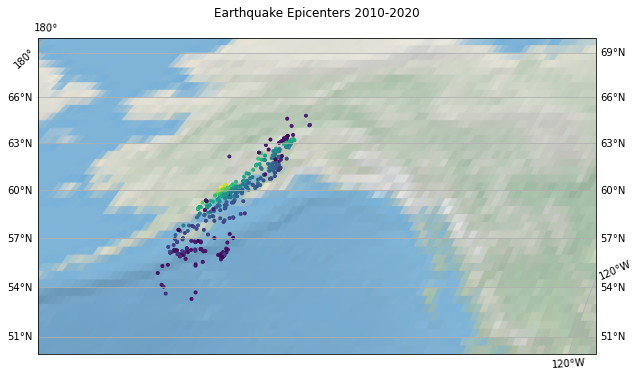

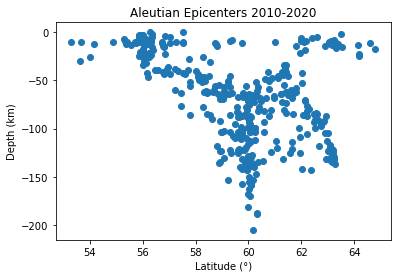

In [78]:
#Alaska
start_day = '2010-01-01'
end_day = '2020-12-31'

standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'

query_url = standard_url + '&starttime=' + start_day + '&endtime=' + end_day + '&minlatitude=50.0' + '&minmagnitude=4.0'
EQ_data = pd.read_csv(query_url)


selected_quakes = EQ_data[(EQ_data['latitude']>50)&(EQ_data['latitude']<65)
                          &(EQ_data['longitude']> -155)&(EQ_data['longitude']< -150)]

plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_extent([-160, -130, 50, 70.], crs=ccrs.PlateCarree())

plt.scatter(selected_quakes['longitude'],selected_quakes['latitude'],marker='.',c=selected_quakes['depth'],transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters 2010-2020')
#ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

plt.show()


plt.scatter(selected_quakes['latitude'],-selected_quakes['depth'])
plt.title('Aleutian Epicenters 2010-2020')
plt.xlabel('Latitude (°)')
plt.ylabel('Depth (km)')
plt.show()

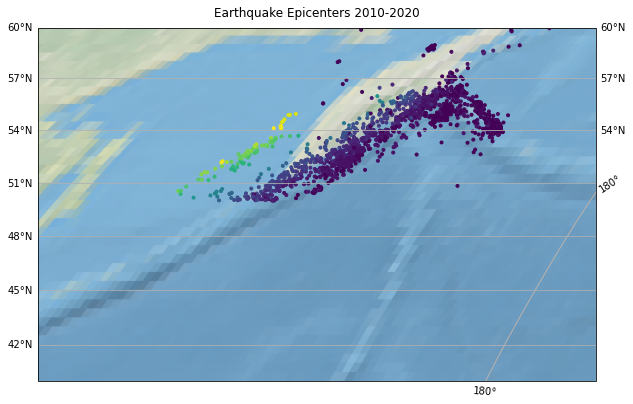

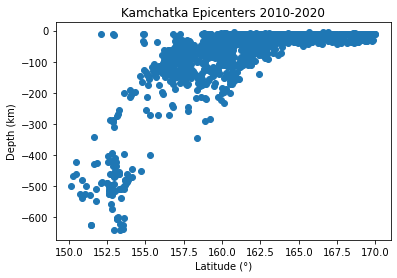

In [87]:
#Kamchatka

selected_quakes = EQ_data[(EQ_data['latitude']>40)&(EQ_data['latitude']<60)
                          &(EQ_data['longitude']> 150)&(EQ_data['longitude']< 170)]

plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_extent([150, 170, 40, 60.], crs=ccrs.PlateCarree())

plt.scatter(selected_quakes['longitude'],selected_quakes['latitude'],marker='.',c=selected_quakes['depth'],transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters 2010-2020')
#ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

plt.show()


plt.scatter(selected_quakes['longitude'],-selected_quakes['depth'])
plt.title('Kamchatka Epicenters 2010-2020')
plt.xlabel('Latitude (°)')
plt.ylabel('Depth (km)')
plt.show()

### Turn in this notebook

Save your completed notebook to pdf and upload to bcourses